### CE 103- INTRODUCTION TO COMPUTERS and PROGRAMMING

### _The topics of the week !_

- PANDAS
    - Data Structures in Pandas
    - Data Manipulation
    - Import/Export Data 
    - Time Series Analysis
    - Visualization
    


Pandas (derived from the term "Panel Data") stands for “Python Data Analysis Library”, which is mostly preferred and widely used library of Python. Its very helpful tool especially for Data Scientists and Analysts, and its built on top of the NumPy package just as SciPy does.


In [7]:
import numpy as np
import pandas as pd

---
# DATA STRUCTURES


> ## 1. Series(1D)

A one-dimensional labeled array which can be in integer, string, python object format etc. The axis labels are referred as index.

> s = pd.Series(data, index = index)

In [8]:
greetings = pd.Series([1, 2, 3], index = ['Good Morning','Good Afternoon','Good Evening'])
print(greetings)

Good Morning      1
Good Afternoon    2
Good Evening      3
dtype: int64


In [9]:
mixed = np.array([3,5,7,9,11,13,15])
s = pd.Series(mixed)        # create a pandas series by using Numpy Array
s

0     3
1     5
2     7
3     9
4    11
5    13
6    15
dtype: int64

In [10]:
s.itemsize    # number of bytes allocated to each item

<ipython-input-10-438f19861951>:1: FutureWarning: Series.itemsize is deprecated and will be removed in a future version
  s.itemsize    # number of bytes allocated to each item


8

In [11]:
s.shape  # gets shape of the series

(7,)

In [12]:
s.count()  # counts values of array

7

In [13]:
s.values  # gets values of array

array([ 3,  5,  7,  9, 11, 13, 15])

In [14]:
s.index  # indexing the array values

RangeIndex(start=0, stop=7, step=1)

In [15]:
# create series from list with missing data

s1 = pd.Series([1,3,5,np.nan,9], index = ['a','b','c','d','e'])   
s1

a    1.0
b    3.0
c    5.0
d    NaN
e    9.0
dtype: float64

In [16]:
# create series with random and range fucntions

rows = np.random.rand(15)
columns = np.arange(15,30)
r = pd.Series(rows, columns)
rows, columns

(array([0.17930395, 0.78369823, 0.4044145 , 0.86236364, 0.71521072,
        0.61736286, 0.00193033, 0.958318  , 0.75331052, 0.88846329,
        0.69838958, 0.76939309, 0.48207812, 0.22068393, 0.51606892]),
 array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

In [17]:
r

15    0.179304
16    0.783698
17    0.404414
18    0.862364
19    0.715211
20    0.617363
21    0.001930
22    0.958318
23    0.753311
24    0.888463
25    0.698390
26    0.769393
27    0.482078
28    0.220684
29    0.516069
dtype: float64

In [18]:
# slicing values from series
#r[:]
#r[0:5]
r[-3:-1]

27    0.482078
28    0.220684
dtype: float64

In [19]:
# create series from dictionary

dictionary ={ "LectureCodes" : ["GTU_CE103","GTU_CE105","GTU_CE247"],  # create a dictionary to convert json object
              "Avg_StudentPerLecture" : 75, 
              "NumberOfClass" : 12 
            }
s2 = pd.Series(dictionary)
s2

LectureCodes             [GTU_CE103, GTU_CE105, GTU_CE247]
Avg_StudentPerLecture                                   75
NumberOfClass                                           12
dtype: object

In [20]:
# append series

s3 = s2.append(r[-3:])
s3

LectureCodes             [GTU_CE103, GTU_CE105, GTU_CE247]
Avg_StudentPerLecture                                   75
NumberOfClass                                           12
27                                                0.482078
28                                                0.220684
29                                                0.516069
dtype: object

In [21]:
# delete item from series

s3.drop('NumberOfClass', inplace = True)
s3

LectureCodes             [GTU_CE103, GTU_CE105, GTU_CE247]
Avg_StudentPerLecture                                   75
27                                                0.482078
28                                                0.220684
29                                                0.516069
dtype: object

In [22]:
# delete item from series

s3.drop('LectureCodes', inplace = True)
s3

Avg_StudentPerLecture          75
27                       0.482078
28                       0.220684
29                       0.516069
dtype: object

In [23]:
s3.drop(29, inplace = True)
s3

Avg_StudentPerLecture          75
27                       0.482078
28                       0.220684
dtype: object

In [24]:
# operations with series

a, b = np.array([3,5,7,9]),np.array([2,4,6,8])
s1 = pd.Series(a) 
s2 = pd.Series(b)
s1 , s2

(0    3
 1    5
 2    7
 3    9
 dtype: int64,
 0    2
 1    4
 2    6
 3    8
 dtype: int64)

In [25]:
s1.add(s2) # add series to each other
s1.add(10) # add fix number to all values in the series
s1.mul(s2) # multiply two series with each other
s1.div(s2) # division of series

0    1.500000
1    1.250000
2    1.166667
3    1.125000
dtype: float64

In [26]:
s1.max()
s2.mean()
s1.median()

6.0

> ## 2. Dataframe (2D)

It is a 2-dimensional labeled data structure with different types of columns. Dataframe is main object in pandas which used to represent data with rows and columns such as excel spreadsheets.

In [27]:
# create a dataframe 

df = pd.DataFrame()
df

""


In [28]:
# create a dataframe using list

consump_df = pd.DataFrame(['monday','wednesday','friday', 'sunday']) 
consump_df

,0
0,monday
1,wednesday
2,friday
3,sunday


In [29]:
# add columns to an existing dataframe

shop_lst = ['milk','bread','egg','newspaper']
consump_df[1] = shop_lst
consump_df[2] = [4, 2, 4, 1] 
consump_df

,0,1,2
0,monday,milk,4
1,wednesday,bread,2
2,friday,egg,4
3,sunday,newspaper,1


In [30]:
# Assign header information to each column

consump_df.columns = ['Service Days', 'Item', 'Cost in TL']
consump_df

,Service Days,Item,Cost in TL
0,monday,milk,4
1,wednesday,bread,2
2,friday,egg,4
3,sunday,newspaper,1


In [31]:
# call data with columns or raws

consump_df.columns
#consump_df.index

Index(['Service Days', 'Item', 'Cost in TL'], dtype='object')

In [32]:
consump_df['Service Days']

0       monday
1    wednesday
2       friday
3       sunday
Name: Service Days, dtype: object

In [33]:
# create a new column by assigning a column that does not exist

consump_df['Customer Name'] = ['Aylin','Hasan','Murat','Selin']
consump_df

,Service Days,Item,Cost in TL,Customer Name
0,monday,milk,4,Aylin
1,wednesday,bread,2,Hasan
2,friday,egg,4,Murat
3,sunday,newspaper,1,Selin


In [34]:
# delete column from dataframe

del consump_df['Cost in TL']
consump_df

,Service Days,Item,Customer Name
0,monday,milk,Aylin
1,wednesday,bread,Hasan
2,friday,egg,Murat
3,sunday,newspaper,Selin


In [35]:
# colomn to raw switch

consump_df.T

,0,1,2,3
Service Days,monday,wednesday,friday,sunday
Item,milk,bread,egg,newspaper
Customer Name,Aylin,Hasan,Murat,Selin


In [36]:
# Data selection in dataframe usinf row label

consump_df.loc[3]                                                                                                                                                          

Service Days        sunday
Item             newspaper
Customer Name        Selin
Name: 3, dtype: object

> ## 3. Indexing

Indexing refers to select specific rows and columns of data from a dataframe. It can handle different combination of row-column selection. 

In [37]:
shift_df = pd.DataFrame(np.random.randn(5, 4), index=['a','b','c', 4, 5], columns=['Site A', 'Site B', 'Site C', 'Site D'])
shift_df

,Site A,Site B,Site C,Site D
a,0.935329,0.102643,-0.373751,1.510658
b,-2.415352,-0.038518,0.438362,-0.563975
c,1.040873,0.722236,-0.683323,0.998207
4,0.855606,1.416956,0.987088,1.704515
5,-0.964835,-2.035745,1.499951,-0.171351


In [38]:
# multi-index level

s = pd.Series(np.random.rand(3), index = [['a','b','c'],[3,5,8]])
s.index.names = ['name','number']
s

name  number
a     3         0.616591
b     5         0.048444
c     8         0.294892
dtype: float64

In [39]:
s['a']  # select a row

number
3    0.616591
dtype: float64

In [40]:
df5 = pd.DataFrame(np.random.randn(6, 4), index=list('abcdef'), columns=list('ABCD'))
df5

,A,B,C,D
a,-0.087852,-0.671507,1.821136,0.927293
b,-0.579540,1.009775,-0.828617,0.156660
c,0.984147,0.879012,0.653540,-1.120316
d,0.066700,0.378908,0.801398,-0.319704
e,-1.317968,-1.896691,-1.438155,0.458146
f,-1.180045,-1.181145,-0.912480,0.730556


In [41]:
df5.loc['e':, 'B':'D']  # select specific rows and columns

,B,C,D
e,-1.896691,-1.438155,0.458146
f,-1.181145,-0.912480,0.730556


---
# NaN vs Null 

NaN or None are not number, they refers to the missing/not available data. In databases _**pd.notnull()**_ or _**df.isnull()**_ are very usefull to detect missing data.

In [42]:
s = pd.Series([np.nan,np.NaN,8,9,10])
s

0     NaN
1     NaN
2     8.0
3     9.0
4    10.0
dtype: float64

In [43]:
s.isnull()

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [44]:
s.isna()

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [45]:
s.dropna()

2     8.0
3     9.0
4    10.0
dtype: float64

In [46]:
s.fillna(33)

0    33.0
1    33.0
2     8.0
3     9.0
4    10.0
dtype: float64

In [47]:
s.fillna('hello')

0    hello
1    hello
2        8
3        9
4       10
dtype: object

---
# IMPORT DATA

In [59]:
# read csv file from storage

df_tuik = pd.read_csv('Test_Input/tuik.csv', sep = '|')  # read csv file with delimiter "|"
df_tuik

,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
0,2012,-4.25,-2.19,-4.24,8.31,1.14,1.58,-5.35,0.02,-0.18,-0.98,-4.06,-2.51
1,2013,1.24,2.89,6.72,-3.98,-2.69,-1.36,2.59,0.29,1.69,-3.96,3.59,-1.79
2,2014,1.67,-2.32,-1.75,-1.42,-1.13,0.74,-0.54,-0.03,1.12,1.13,2.40,-3.67
3,2015,1.13,2.75,-0.65,-2.27,2.51,-1.86,-1.67,1.64,-1.93,0.06,1.01,2.93
4,2016,-0.91,-2.58,7.33,1.78,-10.87,-1.94,9.08,-5.38,5.90,-5.58,-3.13,-4.26
5,2017,-0.99,2.85,5.95,2.36,6.07,-0.79,-2.51,5.02,-8.00,1.77,-0.04,-0.20
6,2018,2.07,0.68,-4.58,-3.26,-5.66,-5.17,1.60,-6.81,-18.34,1.73,-4.14,-0.04
7,2019,-8.57,10.04,7.99,-8.37,-3.70,-3.53,6.60,5.11,7.52,8.46,-0.54,11.17


In [60]:
df_tuik = df_tuik.rename(columns = {'Unnamed: 2':'YEAR'}) # change the column name
df_tuik.head()

,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
0,2012,-4.25,-2.19,-4.24,8.31,1.14,1.58,-5.35,0.02,-0.18,-0.98,-4.06,-2.51
1,2013,1.24,2.89,6.72,-3.98,-2.69,-1.36,2.59,0.29,1.69,-3.96,3.59,-1.79
2,2014,1.67,-2.32,-1.75,-1.42,-1.13,0.74,-0.54,-0.03,1.12,1.13,2.40,-3.67
3,2015,1.13,2.75,-0.65,-2.27,2.51,-1.86,-1.67,1.64,-1.93,0.06,1.01,2.93
4,2016,-0.91,-2.58,7.33,1.78,-10.87,-1.94,9.08,-5.38,5.90,-5.58,-3.13,-4.26


In [61]:
df_tuik.loc[df_tuik['Year'] == 2011]  # indexing rows and columns

,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık


In [62]:
df_tuik_new = df_tuik.loc[(df_tuik['Year'] >= 2000) & (df_tuik['Year'] <= 2020)] # indexing
df_tuik_new

,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
0,2012,-4.25,-2.19,-4.24,8.31,1.14,1.58,-5.35,0.02,-0.18,-0.98,-4.06,-2.51
1,2013,1.24,2.89,6.72,-3.98,-2.69,-1.36,2.59,0.29,1.69,-3.96,3.59,-1.79
2,2014,1.67,-2.32,-1.75,-1.42,-1.13,0.74,-0.54,-0.03,1.12,1.13,2.40,-3.67
3,2015,1.13,2.75,-0.65,-2.27,2.51,-1.86,-1.67,1.64,-1.93,0.06,1.01,2.93
4,2016,-0.91,-2.58,7.33,1.78,-10.87,-1.94,9.08,-5.38,5.90,-5.58,-3.13,-4.26
5,2017,-0.99,2.85,5.95,2.36,6.07,-0.79,-2.51,5.02,-8.00,1.77,-0.04,-0.20
6,2018,2.07,0.68,-4.58,-3.26,-5.66,-5.17,1.60,-6.81,-18.34,1.73,-4.14,-0.04
7,2019,-8.57,10.04,7.99,-8.37,-3.70,-3.53,6.60,5.11,7.52,8.46,-0.54,11.17


In [63]:
data_df = df_tuik_new.dropna(axis='columns')  # delete columns with NaN values
data_df

,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
0,2012,-4.25,-2.19,-4.24,8.31,1.14,1.58,-5.35,0.02,-0.18,-0.98,-4.06,-2.51
1,2013,1.24,2.89,6.72,-3.98,-2.69,-1.36,2.59,0.29,1.69,-3.96,3.59,-1.79
2,2014,1.67,-2.32,-1.75,-1.42,-1.13,0.74,-0.54,-0.03,1.12,1.13,2.40,-3.67
3,2015,1.13,2.75,-0.65,-2.27,2.51,-1.86,-1.67,1.64,-1.93,0.06,1.01,2.93
4,2016,-0.91,-2.58,7.33,1.78,-10.87,-1.94,9.08,-5.38,5.90,-5.58,-3.13,-4.26
5,2017,-0.99,2.85,5.95,2.36,6.07,-0.79,-2.51,5.02,-8.00,1.77,-0.04,-0.20
6,2018,2.07,0.68,-4.58,-3.26,-5.66,-5.17,1.60,-6.81,-18.34,1.73,-4.14,-0.04
7,2019,-8.57,10.04,7.99,-8.37,-3.70,-3.53,6.60,5.11,7.52,8.46,-0.54,11.17


In [64]:
data_df.dtypes

Year            int64
01-Ocak       float64
02-Şubat      float64
03-Mart       float64
04-Nisan      float64
05-Mayıs      float64
06-Haziran    float64
07-Temmuz     float64
08-Ağustos    float64
09-Eylül      float64
10-Ekim       float64
11-Kasım      float64
12-Aralık     float64
dtype: object

In [65]:
data_df.to_csv('Test_Input/tuik_new.csv')  # write data_df to a new csv file 

 In order to write a data frame to an excel file you should import _**"ExcelWriter"**_ module, which you may need to install by using pip command.

> pip install XlsxWriter 

In [66]:
#!pip install --user xlsxwriter

In [67]:
#### OR, you may clone the module as below:

#!git clone https://github.com/jmcnamara/XlsxWriter.git
#
# Change the current working directory
#os.chdir('XlsxWriter')
# 
#!python setup.py install

In [68]:
import numpy as np
import pandas as pd
import xlsxwriter

workbook = xlsxwriter.Workbook('hello.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write('A1', 'Hello world')

workbook.close()

In [69]:
# lets write to excel file
import xlsxwriter

writer = pd.ExcelWriter('Test_Input/tuik.xlsx', engine='xlsxwriter')
data_df.to_excel(writer, 'tuik_sheet')
writer.save()

In [70]:
# read from excel file

xl = pd.ExcelFile('Test_Input/tuik.xlsx')       # load spreadsheet
df1 = xl.parse('tuik_sheet')                    # assign sheet to the dataframe
df1

,Unnamed: 0,Year,01-Ocak,02-Şubat,03-Mart,04-Nisan,05-Mayıs,06-Haziran,07-Temmuz,08-Ağustos,09-Eylül,10-Ekim,11-Kasım,12-Aralık
0,0,2012,-4.25,-2.19,-4.24,8.31,1.14,1.58,-5.35,0.02,-0.18,-0.98,-4.06,-2.51
1,1,2013,1.24,2.89,6.72,-3.98,-2.69,-1.36,2.59,0.29,1.69,-3.96,3.59,-1.79
2,2,2014,1.67,-2.32,-1.75,-1.42,-1.13,0.74,-0.54,-0.03,1.12,1.13,2.40,-3.67
3,3,2015,1.13,2.75,-0.65,-2.27,2.51,-1.86,-1.67,1.64,-1.93,0.06,1.01,2.93
4,4,2016,-0.91,-2.58,7.33,1.78,-10.87,-1.94,9.08,-5.38,5.90,-5.58,-3.13,-4.26
5,5,2017,-0.99,2.85,5.95,2.36,6.07,-0.79,-2.51,5.02,-8.00,1.77,-0.04,-0.20
6,6,2018,2.07,0.68,-4.58,-3.26,-5.66,-5.17,1.60,-6.81,-18.34,1.73,-4.14,-0.04
7,7,2019,-8.57,10.04,7.99,-8.37,-3.70,-3.53,6.60,5.11,7.52,8.46,-0.54,11.17


 Append new sheet to an existing excel file, we need to import (or even install) _**"openpyxl"**_ module because _**"xlswriter"**_ does not support append mode

In [79]:
#!pip install --user openpyxl
import openpyxl

from openpyxl import load_workbook

path = pd.ExcelFile('Test_Input/tuik.xlsx')

df2 = pd.DataFrame({'Percentage': np.random.rand(20)})   # define a new dataframe

with pd.ExcelWriter('Test_Input/tuik.xlsx', engine = 'openpyxl', mode = 'a') as f:
    f.book = load_workbook('Test_Input/tuik.xlsx')
    df2.to_excel(f, 'tuik_NEW_sheet')

---
# DATA MANIPULATION

In [80]:
sales_df = pd.read_excel('Test_Input/sales.xlsx')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [81]:
sales_df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [82]:
sales_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [83]:
sales_df.count()

Row ID           9994
Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64

In [84]:
filt_df = sales_df.drop('Row ID', axis = 1)
filt_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [85]:
s_df = sales_df.sort_values(by=['Sales'], ascending=False)
s_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


In [86]:
s_df = sales_df.drop_duplicates('Region')
s_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196


In [87]:
s_df = sales_df.sort_values(by=['Ship Date'], ascending=True)
s_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7180,7181,CA-2014-106054,2014-01-06,2014-01-07,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,...,30605,South,OFF-AR-10002399,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.780,3,0.0,5.2398
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
5327,5328,CA-2014-130813,2014-01-06,2014-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,...,90049,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


---
# TIME SERIES ANALYSIS

Python library data types for date and time is 'datetime','time', 'calendar'; for Pandas its 'Timestamp'

In [88]:
from datetime import datetime
from matplotlib import dates

In [89]:
now = datetime.now()
now

datetime.datetime(2021, 5, 3, 9, 16, 3, 477642)

In [90]:
pd.date_range('20200310', periods=60)

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
               '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
      

In [91]:
# convert string to datetime
datetime.strptime('11/28/2005','%m/%d/%Y')

datetime.datetime(2005, 11, 28, 0, 0)

In [92]:
date_str = "10 march, 2020"
datetime.strptime(date_str, "%d %B, %Y")

datetime.datetime(2020, 3, 10, 0, 0)

In [93]:
print('Type :- ',type(now))

Type :-  <class 'datetime.datetime'>


In [94]:
now = datetime.now()
print('Hour: ', now.hour)
print('Minute: ', now.minute)

Hour:  9
Minute:  16


In [95]:
now.weekday()  # gets the day of the week

0

In [96]:
# dealing with time zone

from datetime import timezone

In [97]:
# UTC(Coordinated Universal Time) integer representing nanoseconds elapsed since midnight Thursday, January 1, 1970

loc_time = datetime.utcnow()   
loc_time

datetime.datetime(2021, 5, 3, 6, 16, 7, 117755)

In [98]:
ce103_final = datetime.utcfromtimestamp(159194043)   # defines nanoseconds from UTC to Final Exam date
ce103_final

datetime.datetime(1975, 1, 17, 12, 34, 3)

In [99]:
import calendar  # is also a helpful module to define date operations

In [100]:
calendar.day_name[ce103_final.weekday()]  # find the weekday of given timestamp

'Friday'

In [101]:
# Timespan and Time difference settlement

from datetime import timedelta

In [102]:
# get difference between two datetime objects

from datetime import timedelta

time_df = datetime(2020, 3, 10) + timedelta(60)  # adds 60 days to start time

In [103]:
timedelta(days = 130, hours = 21, minutes = 43) # gives day, seconds

datetime.timedelta(days=130, seconds=78180)

In [104]:
# DateTime objects in Pandas

pd.to_datetime("26th of march, 2020")

Timestamp('2020-03-26 00:00:00')

In [105]:
pd.Timestamp(datetime(2020, 3, 26))

Timestamp('2020-03-26 00:00:00')

In [106]:
pd.Timestamp('2005-11-28')

Timestamp('2005-11-28 00:00:00')

In [107]:
pd.Timestamp(2012, 5, 1)

Timestamp('2012-05-01 00:00:00')

In [108]:
pd.Period('2011-01') 

Period('2011-01', 'M')

In [109]:
pd.Period('2012-05', freq='D')  # sets the frequency as Day

Period('2012-05-01', 'D')

In [110]:
# set series with random dates

pd.date_range('2005-10-18 20:02:55', periods=5, freq='D')

DatetimeIndex(['2005-10-18 20:02:55', '2005-10-19 20:02:55',
               '2005-10-20 20:02:55', '2005-10-21 20:02:55',
               '2005-10-22 20:02:55'],
              dtype='datetime64[ns]', freq='D')

In [111]:
[datetime(2012, 5, 1), datetime(2012, 5, 2), datetime(2012, 5, 3)]

[datetime.datetime(2012, 5, 1, 0, 0),
 datetime.datetime(2012, 5, 2, 0, 0),
 datetime.datetime(2012, 5, 3, 0, 0)]

In [112]:
pd.to_datetime([250, 4, 30], unit='D')

DatetimeIndex(['1970-09-08', '1970-01-05', '1970-01-31'], dtype='datetime64[ns]', freq=None)

In [113]:
pd.to_datetime([10, 20, 30], unit='D', origin=pd.Timestamp('1900-01-01'))

DatetimeIndex(['1900-01-11', '1900-01-21', '1900-01-31'], dtype='datetime64[ns]', freq=None)

In [114]:
pd.to_datetime([2903847.3, 3898373281, 190283749.9828374], unit='s')  # unit "s" refers to seconds

DatetimeIndex([   '1970-02-03 14:37:27.300000',
                         '2093-07-14 01:28:01',
               '1976-01-12 08:35:49.982837409'],
              dtype='datetime64[ns]', freq=None)

In [115]:
pd.to_datetime([2903847.3, 38942081, 190283749.9828374], unit='ns') 

DatetimeIndex(['1970-01-01 00:00:00.002903847',
               '1970-01-01 00:00:00.038942081',
               '1970-01-01 00:00:00.190283749'],
              dtype='datetime64[ns]', freq=None)

In [116]:
start = datetime(2020, 3, 10)
end = datetime.now()
pd.date_range(start, end) # default frequency for date_range is a calendar day

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19',
               ...
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03'],
              dtype='datetime64[ns]', length=420, freq='D')

In [117]:
pd.bdate_range(start, end, freq='B')  # the default for bdate_range is a business day

DatetimeIndex(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-23',
               ...
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-03'],
              dtype='datetime64[ns]', length=300, freq='B')

#### _**Timestamp Limitations**_

In [118]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [119]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

---
# VISUALIZATION

In [120]:
shipping_df = sales_df.drop_duplicates('Ship Date')
shipping_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

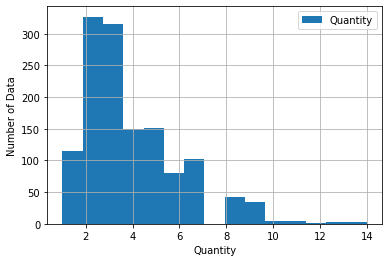

In [121]:
import matplotlib.pyplot as plt

shipping_df['Quantity'].hist(bins=15)

plt.xlabel('Quantity')
plt.ylabel('Number of Data')
labels = ["Quantity"]
plt.legend(labels)
plt.show()

/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<BarContainer object of 1334 artists>

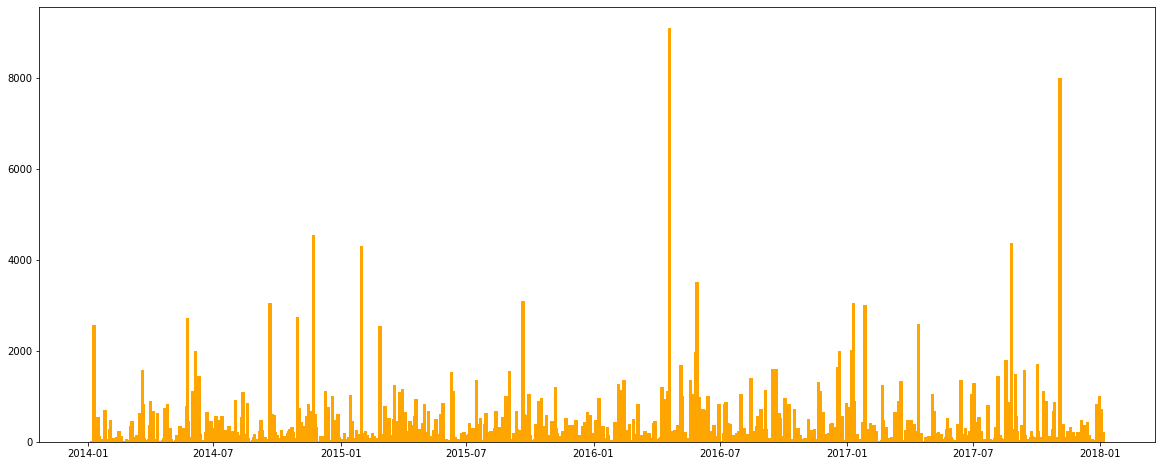

In [122]:
fig = plt.figure(figsize=(20, 8))
df_x = shipping_df['Ship Date'].tolist()
df_y = shipping_df['Sales'].tolist()
plt.bar(df_x,df_y, width=5, color='orange')

In [123]:
# lets define time random series with date index

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))


In [124]:
# lets define a random time series and visualize it

lockdown_df = pd.DataFrame(np.random.randn(1000,1)*np.sin(30), columns=['BrainCell'], index=pd.date_range('2020-03-10', periods = 1000, freq='T'))
df = lockdown_df.cumsum()
df

,BrainCell
2020-03-10 00:00:00,0.811763
2020-03-10 00:01:00,2.584965
2020-03-10 00:02:00,3.848785
2020-03-10 00:03:00,3.734831
2020-03-10 00:04:00,4.102985
...,...
2020-03-10 16:35:00,9.225638
2020-03-10 16:36:00,8.675522
2020-03-10 16:37:00,8.813559
2020-03-10 16:38:00,8.410807


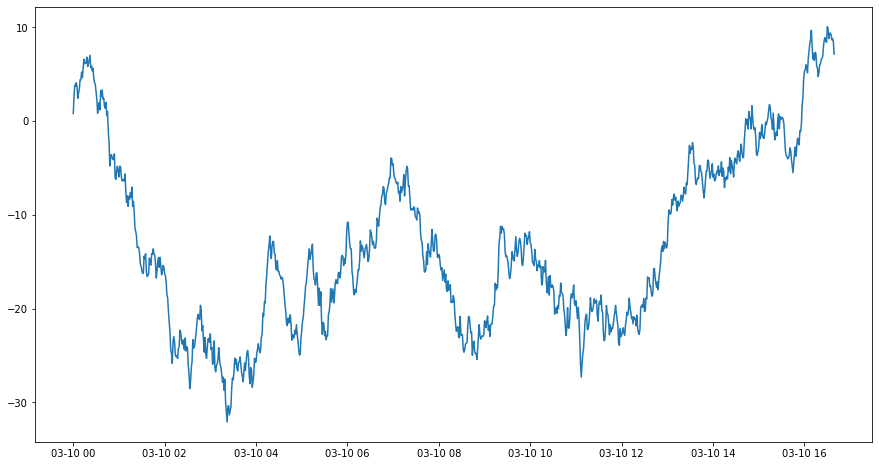

In [125]:
fig = plt.figure( figsize=(15, 8) )
plt.plot(df)

---
## Homework #10

Please follow the instructions below. 

1 - Visit the following web page and import dataset in excel format. https://data.ibb.gov.tr/dataset/74a7f698-557f-40ff-876a-c28654dff944/resource/9baff1fa-54f3-480c-91ae-986e582d42c7/download/rayl-sistemlere-ait-istasyon-bilgileri.xlsx

<p align="left">  <img src="./Figures/ibb.png" width = 50% > </p>

2 - Read the columns from the excel file ("Raylı Sistemler İstasyon B." Sheet), classify them belongs to "İlçe Adı" column and draw histogram plot to show how many stations in each "İlçe Adı" .

3 - Create new sheet in the same excel file named as "Analiz", copy "İstasyon Adı" and "İstasyon Büyüklüğü" columns to your new sheet. Create a column in this sheet as "Günlük Yolcu Sayısı" as a random number between 2000-7000. Read these columns and plot a figure for İstasyon Büyüklüğü vs Günlük Yolcu Sayısı.  

4 - Compute the average "Günlük Yolcu Sayısı" per "İlçe Adı". 


*** Be carefull about "NaN or Null values" in your data, they may disrupt your calculations.

PS : Do not forget to upload your answer sheets to CE_103 Class on MS Teams.
